### Logistic regression is a fundamental algorithm for binary classification tasks.
Let's walk through a  covering 
1. data preprocessing, 
2. model training, 
3. evaluation, and 
4. visualization.


#### 1. Import Libraries


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

#### 2. Load Dataset


In [5]:
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Labels (0: malignant, 1: benign)

#### 3. Split Data
Split the dataset into training (80%) and testing (20%) sets:



In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#### 4. Feature Scaling
Standardize features to improve model performance:

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### 5. Train Logistic Regression Model
Create and train the model:

In [8]:
model = LogisticRegression(max_iter=10000, random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=10000, random_state=42)


#### 6. Evaluate Model
Evaluate performance using accuracy, confusion matrix, and classification report:

In [9]:
y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9824561403508771

Confusion Matrix:
 [[41  1]
 [ 1 71]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114




#### 7. ROC Curve and AUC
Visualize performance with an ROC curve and calculate the AUC score:

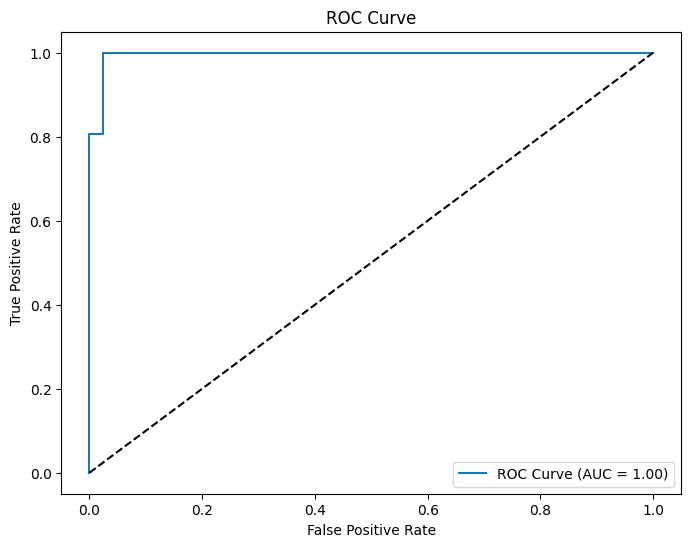

In [10]:
y_proba = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#### 8. Make Predictions
Test the model on a new sample:

In [12]:
sample = X_test_scaled[0].reshape(1, -1)
prediction = model.predict(sample)
probability = model.predict_proba(sample)[0][1]

print(f"Prediction: {prediction[0]} ({data.target_names[prediction][0]})")
print(f"Probability: {probability:.4f}")

Prediction: 0 (malignant)
Probability: 0.0000
